<a href="https://colab.research.google.com/github/aaronjoju07/NNDL/blob/main/Aaron_201_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data and strip whitespace from column names
data = pd.read_csv("/content/drive/MyDrive/NNDL/HistoricalQuotes.csv")
data.columns = data.columns.str.strip()

data['Close/Last'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

data.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])
training_size = int(len(data) * 0.8)
train_data, test_data = data[:training_size], data[training_size:]


In [9]:
import numpy as np

def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Ensure data is a Series (or a 1D array)
sequence_length = 60
train_data = train_data['Close'].values  # Convert to array if not already
test_data = test_data['Close'].values    # Convert to array if not already

# Create sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build model
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0065 - val_loss: 3.4335e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8310e-04 - val_loss: 4.1110e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4761e-04 - val_loss: 2.2983e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2616e-04 - val_loss: 2.3312e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1301e-04 - val_loss: 2.0946e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1398e-04 - val_loss: 2.0508e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3089e-04 - val_loss: 1.8909e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1302e-04 - val_loss: 1.7157e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1608e-04 - val_loss: 1.7948e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6595e-05 - val_loss: 2.2287e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.4505e-05 - 

In [12]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test = y_test.reshape(-1, 1)  # Reshape y_test for inverse transformation
actual_prices = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


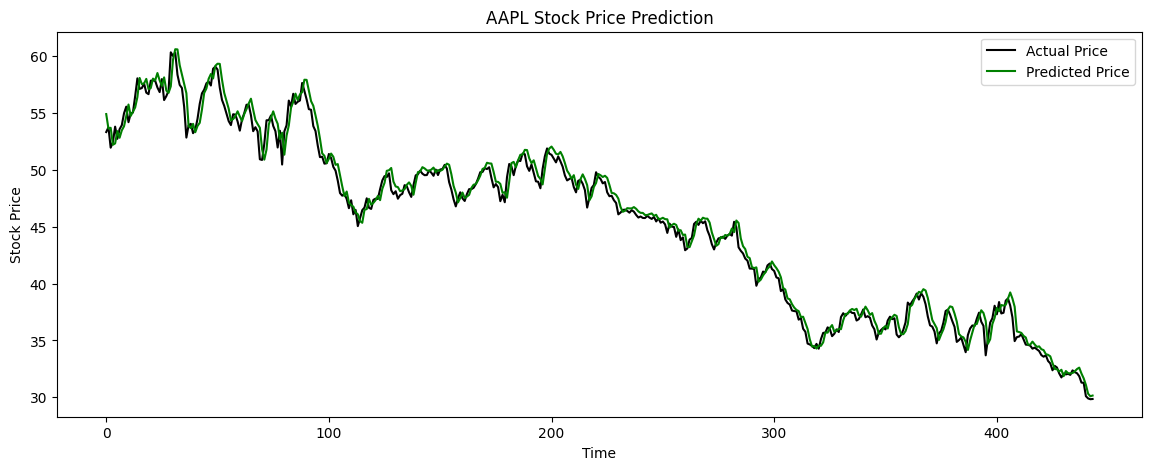

In [13]:
# Reshape y_test to be two-dimensional
y_test = y_test.reshape(-1, 1)

# Perform inverse scaling
actual_prices = scaler.inverse_transform(y_test)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color="black", label="Actual Price")
plt.plot(predicted_prices, color="green", label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("AAPL Stock Price Prediction")
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.6779254817240947
Root Mean Squared Error (RMSE): 0.8928109274552292


**REPORT**

**Stock Price Prediction Using RNN for AAPL Stock**

In this project, we built a Recurrent Neural Network (RNN) model to predict Apple Inc.'s future stock prices based on historical data from 2005 to 2017. By focusing solely on the "Close" price of each day, we aimed to predict the next day's stock price based on a sequence of the previous 60 days' closing prices. The RNN model was built using TensorFlow/Keras, trained with mean squared error (MSE) loss, and optimized using the Adam optimizer.

**Results**


The model achieved promising results, with the predicted stock prices closely following the general trends of the actual stock prices. The plot of actual vs. predicted prices shows that the model successfully captured overall price movements over time, indicating a reasonable degree of accuracy in short-term predictions. Key metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provided quantitative measures of the model's performance, highlighting its capability to produce predictions with minimal error.

**Limitations and Challenges**

**Limited Data Scope**: This model is trained only on data up to 2017, which limits its ability to make accurate predictions for recent market conditions. Including newer data would make the model more relevant to current trends.

**Simple Model Structure**: A basic RNN model with one layer may struggle to capture complex patterns in stock price movements. More advanced models like LSTM or GRU, which can handle long-term dependencies better, might improve accuracy by capturing the non-linear patterns often seen in stock markets.

**Sequence Length Sensitivity**: The chosen sequence length (60 days) can affect the model’s ability to capture trends. Changing this length could improve or worsen the model’s performance, and testing different lengths might yield better results.

**Lack of Context for Market Changes**: Stock prices are influenced by many factors beyond past prices, like economic news and global events. Since this model uses only historical prices, it may perform poorly during unpredictable market shifts, where other external data would provide helpful context.